In [1]:
import pandas as pd

# Define the file path
file_path = '/Users/arka_bagchi/Desktop/GLP_Data/values at 12 weeks.xlsx'

# Read the Excel file
try:
    data = pd.read_excel(file_path)
    print("File successfully read. Here's a preview:")
    print(data.head())  # Display the first few rows of the dataframe
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


File successfully read. Here's a preview:
   company         drug  dose  %weight loss  nausea  vomit   N
0  Zealand  Survodutide   0.0          -2.0    19.5    5.2  77
1  Zealand  Survodutide   0.6          -4.7    33.8    9.1  77
2  Zealand  Survodutide   2.4          -7.0    65.4   29.5  78
3  Zealand  Survodutide   3.6          -7.8    62.3   33.8  77
4  Zealand  Survodutide   4.8          -7.8    63.6   35.1  77


In [2]:
# Check the number of rows and columns
num_rows, num_columns = data.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

# Check data types of each column
print("\nData Types of Each Column:")
print(data.dtypes)


Number of Rows: 30
Number of Columns: 7

Data Types of Each Column:
company          object
drug             object
dose            float64
%weight loss    float64
nausea          float64
vomit           float64
N                 int64
dtype: object


In [3]:
# Get unique values in the 'company' column
unique_companies = data['company'].unique()
print("Unique Companies:")
print(unique_companies)

# Get unique values in the 'drug' column
unique_drugs = data['drug'].unique()
print("\nUnique Drugs:")
print(unique_drugs)


Unique Companies:
['Zealand' 'Sciwind' 'Pfizer' 'Lilly' 'Structure' 'Altimmune']

Unique Drugs:
['Survodutide' 'XW003' 'danuglipron' 'Semaglutide' 'GSBR-1290'
 'Orforglipron' 'Pemvidutide']


In [4]:
# Group the data by 'drug' and calculate the min and max dose for each drug
dose_ranges = data.groupby('drug')['dose'].agg([min, max])

# Print the dose range for each drug
print("Dose Range for Each Drug:")
print(dose_ranges)


Dose Range for Each Drug:
              min    max
drug                    
GSBR-1290     0.0  120.0
Orforglipron  0.0   45.0
Pemvidutide   0.0    2.4
Semaglutide   0.0    2.4
Survodutide   0.0    4.8
XW003         0.0    2.4
danuglipron   0.0  120.0


In [1]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that float data is displayed to two decimal points for clarity
pd.options.display.float_format = '{:.2f}'.format

# 1. Descriptive Statistics
print("Descriptive Statistics for Numerical Columns:")
descriptive_stats = data.describe()
print(descriptive_stats)

# 2. Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = data[['%weight loss', 'nausea', 'vomit']].corr()
print(correlation_matrix)

# Visual representation of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Weight Loss and Adverse Events')
plt.show()

# 3. Grouped Analysis by Drug
print("\nGrouped Descriptive Statistics by Drug:")
grouped_by_drug = data.groupby('drug')[['%weight loss', 'nausea', 'vomit']].describe()
print(grouped_by_drug)


NameError: name 'pd' is not defined

In [8]:
from scipy.stats import ttest_ind

# T-test for %weight loss between two drugs, for example Survodutide and XW003
survodutide_weight_loss = data[data['drug'] == 'Survodutide']['%weight loss']
xw003_weight_loss = data[data['drug'] == 'XW003']['%weight loss']

t_stat, p_value = ttest_ind(survodutide_weight_loss, xw003_weight_loss)
print(f"T-test for %weight loss between Survodutide and XW003: t-statistic = {t_stat}, p-value = {p_value}")


T-test for %weight loss between Survodutide and XW003: t-statistic = -0.17362155376357144, p-value = 0.8678724242225847


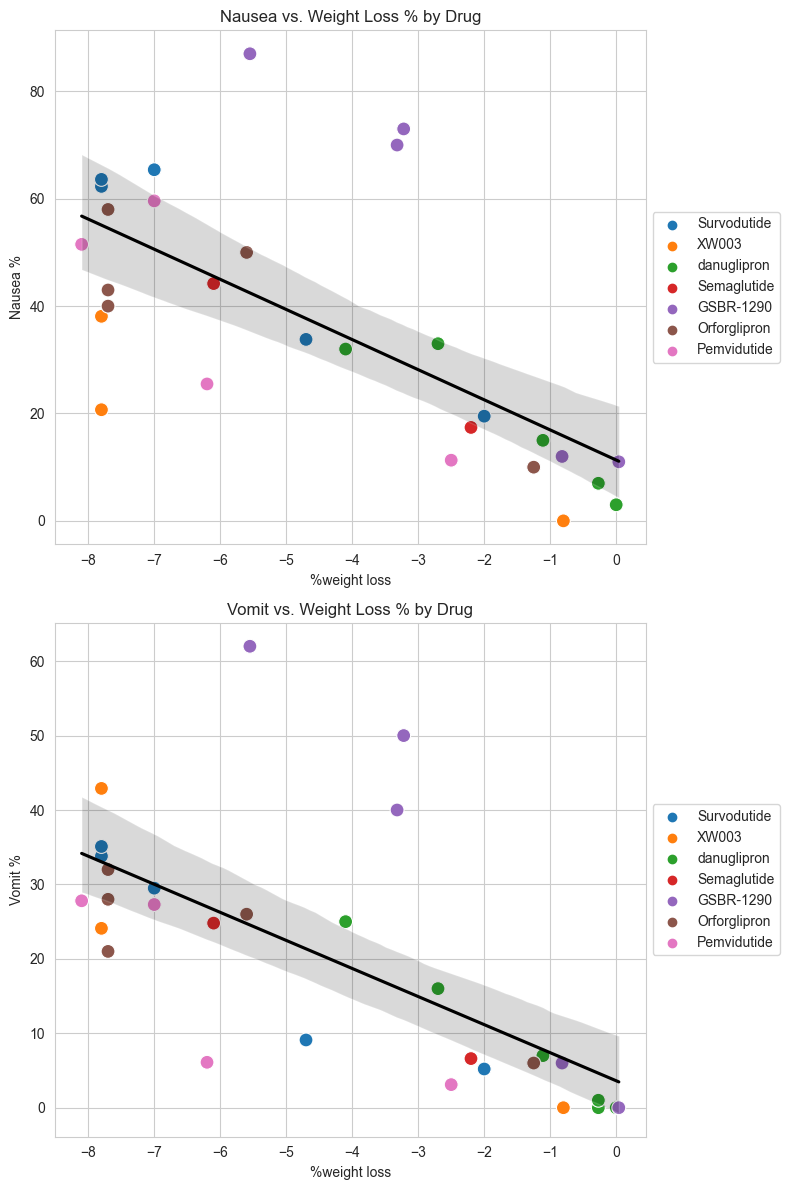

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create scatter plots for nausea and vomit separately
fig, axes = plt.subplots(2, 1, figsize=(8, 12))  # 2 rows, 1 column

# Scatter plot for %weight loss vs nausea
sns.scatterplot(ax=axes[0], data=data, x='%weight loss', y='nausea', hue='drug', s=100)
sns.regplot(ax=axes[0], data=data, x='%weight loss', y='nausea', scatter=False, color='black', ci=95)
axes[0].set_title('Nausea vs. Weight Loss % by Drug')
axes[0].set_ylabel('Nausea %')

# Scatter plot for %weight loss vs vomit
sns.scatterplot(ax=axes[1], data=data, x='%weight loss', y='vomit', hue='drug', s=100)
sns.regplot(ax=axes[1], data=data, x='%weight loss', y='vomit', scatter=False, color='black', ci=95)
axes[1].set_title('Vomit vs. Weight Loss % by Drug')
axes[1].set_ylabel('Vomit %')

# Set the legend outside the plot
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


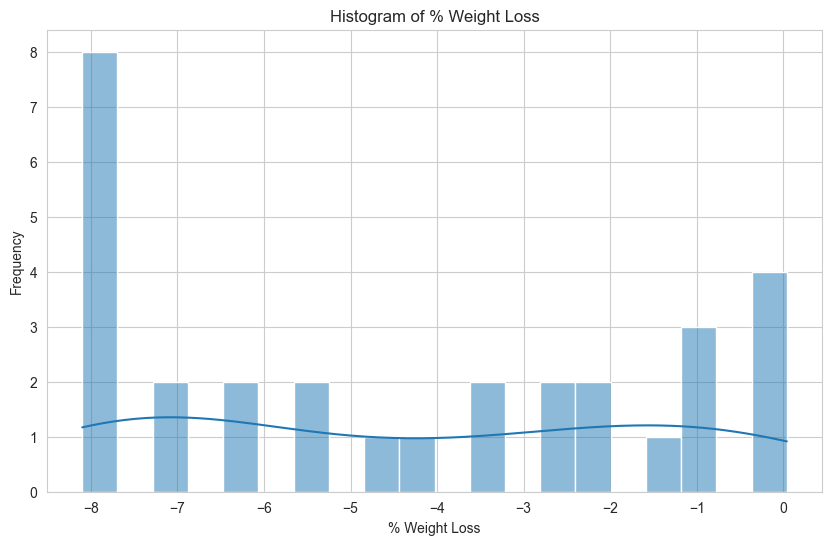

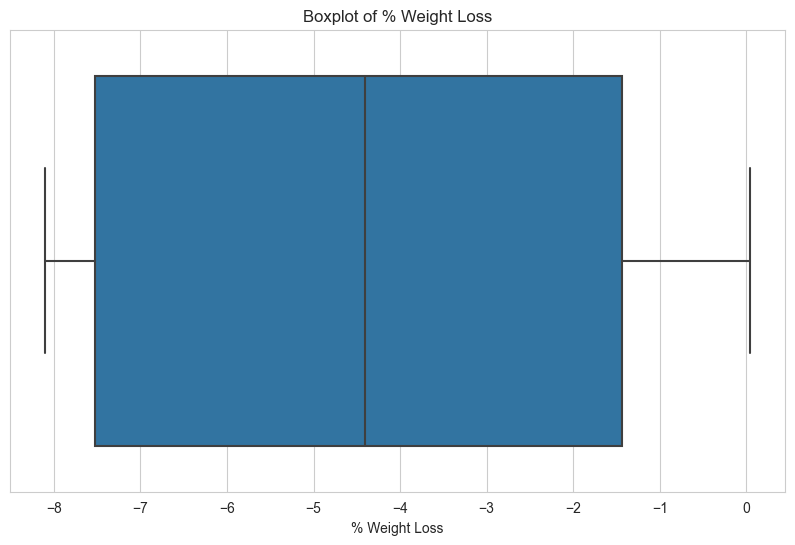

Descriptive Statistics for % Weight Loss:
count   30.00
mean    -4.30
std      2.96
min     -8.10
25%     -7.53
50%     -4.40
75%     -1.44
max      0.04
Name: %weight loss, dtype: float64


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Histogram of % weight loss
plt.figure(figsize=(10, 6))
sns.histplot(data['%weight loss'], kde=True, bins=20)
plt.title('Histogram of % Weight Loss')
plt.xlabel('% Weight Loss')
plt.ylabel('Frequency')
plt.show()

# Boxplot of % weight loss
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['%weight loss'])
plt.title('Boxplot of % Weight Loss')
plt.xlabel('% Weight Loss')
plt.show()

# Descriptive statistics of % weight loss
descriptive_stats = data['%weight loss'].describe()
print("Descriptive Statistics for % Weight Loss:")
print(descriptive_stats)
